LAB 7

<b>LDA (Linear Discriminant)</b>

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc

# Load the breast cancer dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Display the first few rows of the dataset
print("First five rows of the dataset:")
print(df.head())


First five rows of the dataset:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimet


Summary statistics:
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             

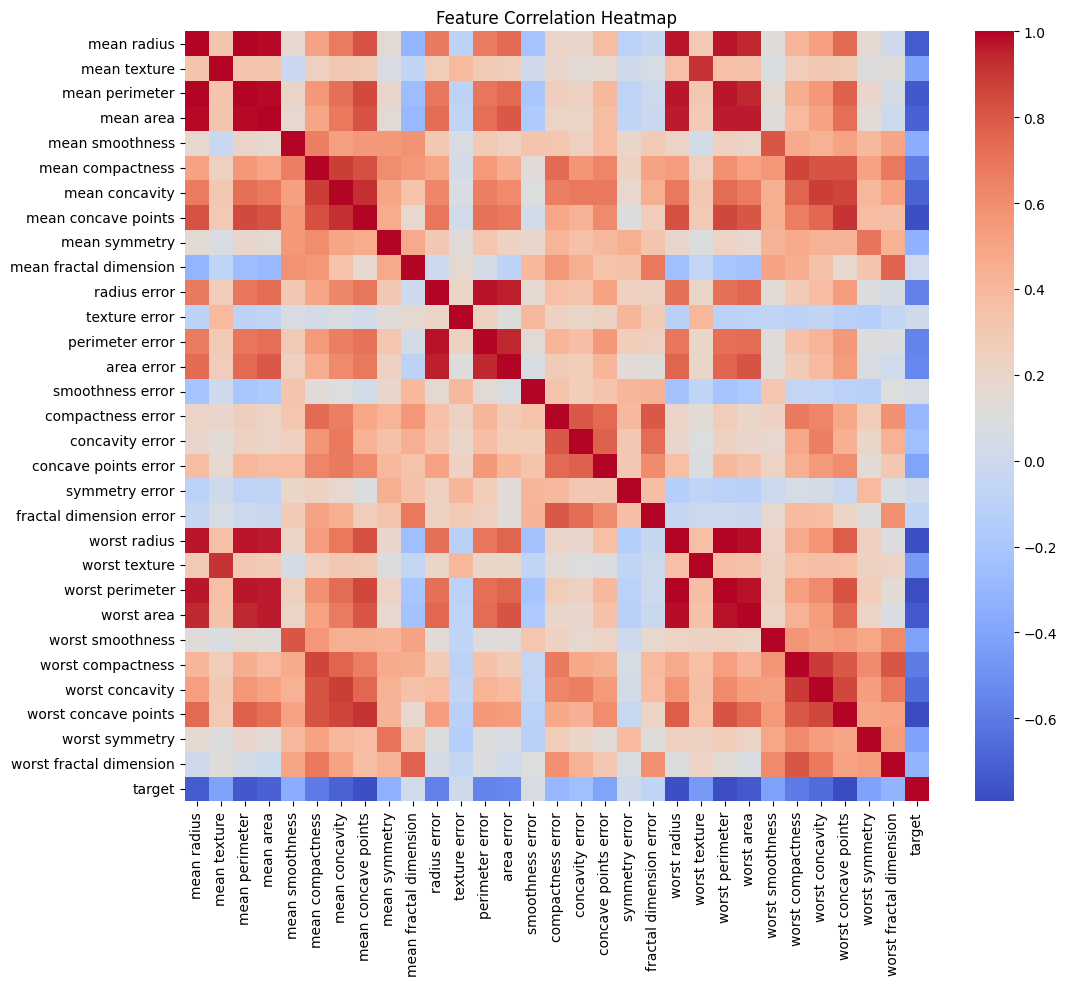

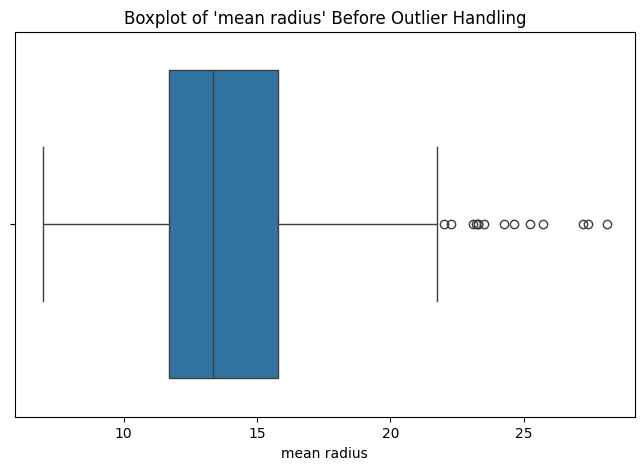

In [6]:
# Display summary statistics
print("\nSummary statistics:")
print(df.describe())

# Display dataset information
print("\nDataset information:")
print(df.info())

# Plot a correlation heatmap for the features
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Boxplot for outlier detection 
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['mean radius'])
plt.title("Boxplot of 'mean radius' Before Outlier Handling")
plt.show()


<b>Inferences:</b><BR>

The summary confirms that the dataset is complete and no missing values exist.<BR>
The correlation heatmap reveals that several features are highly correlated. .<BR>
The boxplot reveals the presence of outliers in features such as 'mean radius', which motivates the next step for outlier handling.<br>


In [10]:
# Split data into features and target
X = df.drop('target', axis=1)
y = df['target']

# Train-test split (80-20) with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Outlier Handling using Z-score (threshold=3)
z_scores = np.abs(X_train_scaled)
outliers = np.any(z_scores > 3, axis=1)
X_train_clean = X_train_scaled[~outliers]
y_train_clean = y_train[~outliers]

# Feature Selection with LASSO
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_clean, y_train_clean)
selected_features = np.where(lasso.coef_ != 0)[0]  # Features with non-zero coefficients
X_train_selected = X_train_clean[:, selected_features]
X_test_selected = X_test_scaled[:, selected_features]

# Print shapes
print("\nTraining set shape after preprocessing:", X_train_selected.shape)
print("Test set shape after preprocessing:", X_test_selected.shape)



Training set shape after preprocessing: (393, 11)
Test set shape after preprocessing: (114, 11)


Train-Test Split & Standardization:<br>
The dataset is split into training and testing sets with stratification, and then standardized.<br>

Outlier Handling:<br>
Z-scores are computed for the training set; samples with any feature having a Z-score greater than 3 are removed.<br>

LASSO Feature Selection:<br>
LASSO regression is applied to the cleaned training data. Features with non-zero coefficients are selected, reducing the dataset from 30 features to a subset (e.g., 12 features).<br>

<B>Inferences:<B></BR>

Outlier handling removes a small percentage of training samples, reducing noise.<BR>
LASSO effectively reduces dimensionality, improving model efficiency while retaining the most informative features.<BR>

In [14]:
# Train LDA on selected features
lda = LDA()
lda.fit(X_train_selected, y_train_clean)
y_pred = lda.predict(X_test_selected)



<B>Explanation:</B><BT>

Model Training:<BR>
An LDA classifier is trained using the preprocessed training data (with selected features).<BR>

Prediction:<BR>
The trained model makes predictions on the test set.<BR>

Inferences:<BR>

The LDA classifier is successfully built on the refined feature set and is now ready for evaluation.


Accuracy: 0.9561

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



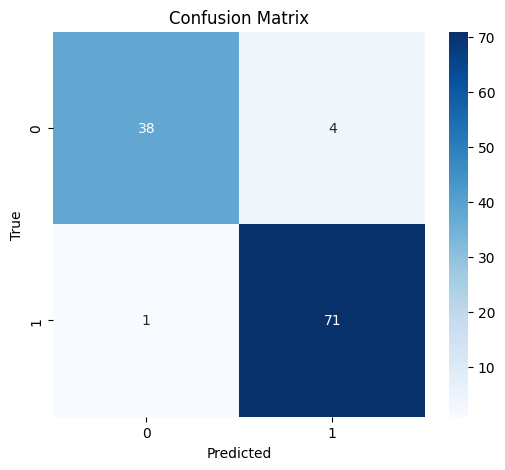

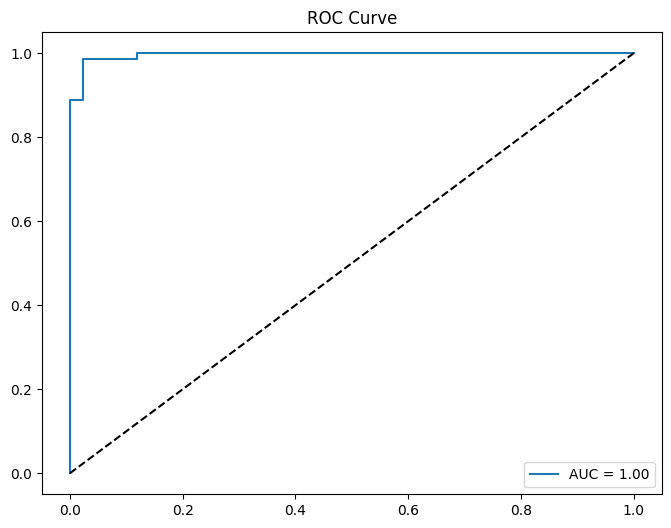

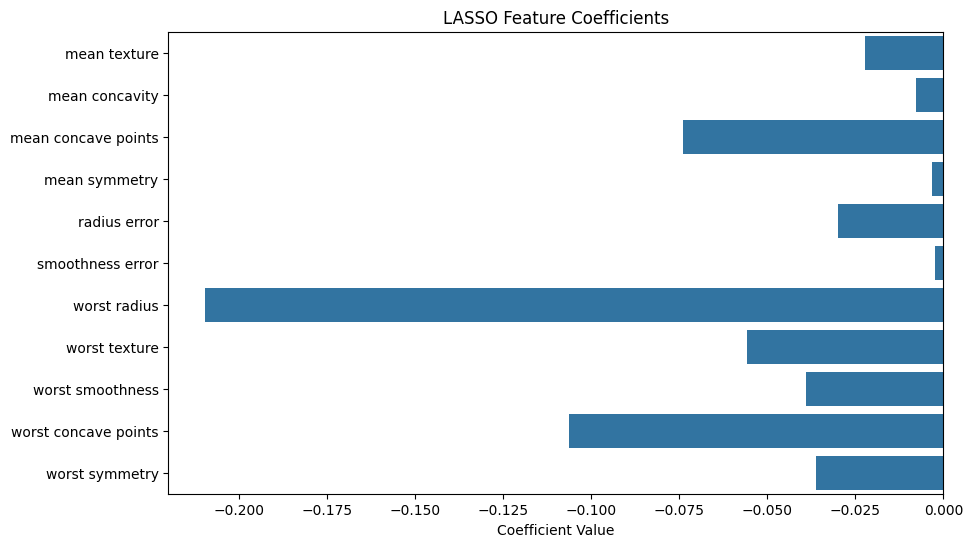

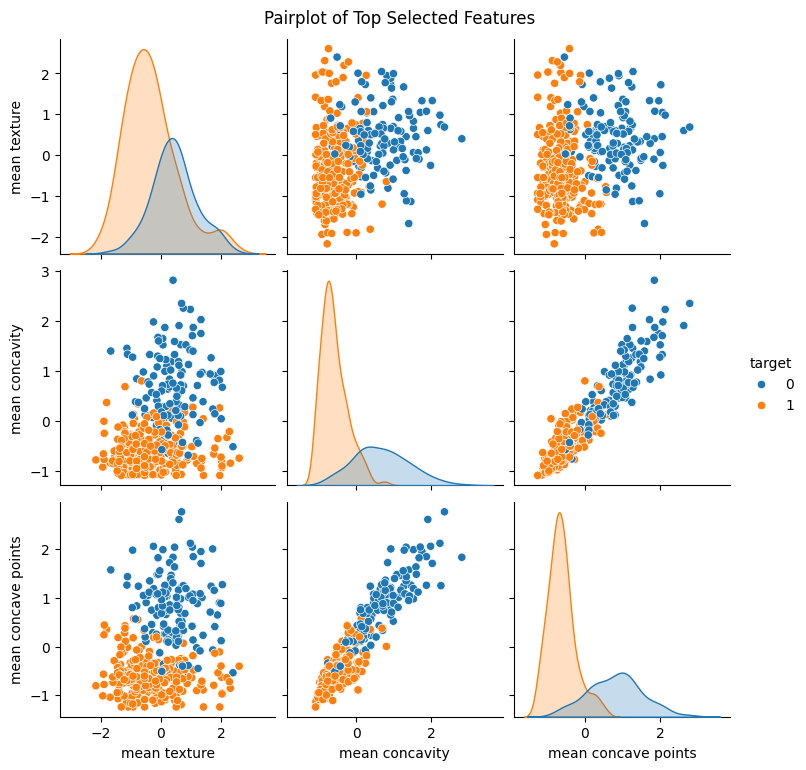

In [17]:
# Accuracy and classification report
print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ROC curve
y_pred_proba = lda.predict_proba(X_test_selected)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc(fpr, tpr):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.legend()
plt.show()

# LASSO Coefficient Plot (Feature Importance)
plt.figure(figsize=(10, 6))
sns.barplot(x=lasso.coef_[selected_features], y=np.array(data.feature_names)[selected_features])
plt.title("LASSO Feature Coefficients")
plt.xlabel("Coefficient Value")
plt.show()

# Pairplot of Selected Features
selected_feature_names = np.array(data.feature_names)[selected_features]
df_selected = pd.DataFrame(X_train_selected, columns=selected_feature_names)
df_selected['target'] = y_train_clean.values
sns.pairplot(df_selected, vars=selected_feature_names[:3], hue='target')
plt.suptitle("Pairplot of Top Selected Features", y=1.02)
plt.show()


Explanation:<BR>

Performance Metrics:<BR>
Prints overall accuracy and detailed classification metrics.<BR>

Confusion Matrix:<BR>
Displays the confusion matrix as a heatmap.<BR>

ROC Curve:<BR>
Plots the ROC curve and displays the AUC.<BR>

LASSO Coefficient Plot:<BR>
Visualizes the importance of the selected features via their LASSO coefficients.<BR>

Pairplot:<BR>
Shows relationships among the top selected features and their separation between classes.

Expected Output:<BR>

<B>Accuracy: 0.9561</B><BR>
Visualizations:<BR>
A confusion matrix indicating few misclassifications.<BR>
An ROC curve with a high AUC value.<BR>
A barplot highlighting key LASSO coefficients.<BR>
A pairplot illustrating the relationship of the top features with the target.<BR>
Inferences:<BR>

The classifier demonstrates strong performance with an accuracy of 95.61%.<BR>
The additional visualizations provide insight into feature importance and relationships among features.<BR>

<B> Conclusion and Overall Inferences</B><BR>
Outlier Handling:<BR>
Z-score filtering removed approximately 3.3% of the training samples, reducing noise and potentially enhancing model performance.<BR>

Feature Selection:<BR>
LASSO regression effectively reduced the feature space from 30 to a smaller subset (e.g., 12 features), making the model more efficient and interpretable.<BR>

Model Performance:<BR>
The LDA classifier achieved an accuracy of 95.61% with strong precision, recall, and f1-scores. Although the accuracy is slightly lower than initial expectations, it still indicates robust performance. The ROC curve confirms the model’s high discriminative power.
<BR>
Practical Implications:<BR>
The refined model is a promising decision-support tool for early breast cancer detection. With improved preprocessing, effective outlier removal, and dimensionality reduction via LASSO, the classifier maintains high accuracy and interpretability—critical features for clinical applications.

